#Importing Libraries and Data Loading

In [ ]:
pip install category_encoders

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 2.1 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
import lightgbm as lgb
from sklearn.ensemble import StackingRegressor
from collections import defaultdict
import category_encoders as ce
from sklearn.metrics import classification_report

In [ ]:
df = pd.read_csv('/content/zameen-updated.csv')

In [ ]:
df.head(5)

,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,area,purpose,bedrooms,date_added,agency,agent,Area Type,Area Size,Area Category
0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,4 Marla,For Sale,2,2/4/2019,NaN,NaN,Marla,4.0,0-5 Marla
1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,5.6 Marla,For Sale,3,5/4/2019,NaN,NaN,Marla,5.6,5-10 Marla
2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,8 Marla,For Sale,5,7/17/2019,NaN,NaN,Marla,8.0,5-10 Marla
3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,2 Kanal,For Sale,4,4/5/2019,NaN,NaN,Kanal,2.0,1-5 Kanal
4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,8 Marla,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,Marla,8.0,5-10 Marla


In [ ]:
df.columns

Index(['property_id', 'location_id', 'page_url', 'property_type', 'price',
       'location', 'city', 'province_name', 'latitude', 'longitude', 'baths',
       'area', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Area Type', 'Area Size', 'Area Category'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 20 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   property_id    168446 non-null  int64  
 1   location_id    168446 non-null  int64  
 2   page_url       168446 non-null  object 
 3   property_type  168446 non-null  object 
 4   price          168446 non-null  int64  
 5   location       168446 non-null  object 
 6   city           168446 non-null  object 
 7   province_name  168446 non-null  object 
 8   latitude       168446 non-null  float64
 9   longitude      168446 non-null  float64
 10  baths          168446 non-null  int64  
 11  area           168446 non-null  object 
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Area Type      168446 non-nul

In [ ]:
df.describe()

,property_id,location_id,price,latitude,longitude,baths,bedrooms,Area Size
count,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,168446.000000
mean,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,5.892188
std,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,5.778327
min,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000
25%,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,3.000000
50%,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,5.000000
75%,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,8.000000
max,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,800.000000


#Data Preprocessing

In [ ]:
df = df.drop(columns=['page_url','agent','agency','area'], axis = 1)

In [ ]:
df = df[df['price']>0]

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

<ipython-input-10-cb8603328954>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')


In [ ]:
df['Area Type'].unique()

array(['Marla', 'Kanal'], dtype=object)

In [ ]:
df['Area Category'].unique()

array(['0-5 Marla', '5-10 Marla', '1-5 Kanal', '10-15 Marla',
       '5-10 Kanal', '15-20 Marla', '15-20 Kanal', '30-40 Kanal',
       '90-100 Kanal', '400-500 Kanal', '10-15 Kanal', '60-70 Kanal',
       '20-30 Kanal', '50-60 Kanal', '70-80 Kanal', '40-50 Kanal',
       '100-200 Kanal', '80-90 Kanal', '500-600 Kanal', '200-300 Kanal',
       '600-700 Kanal', '700-800 Kanal'], dtype=object)

In [ ]:
df[df['Area Type']=='Kanal'].head(5)

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Area Type,Area Size,Area Category
3,656161,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,Kanal,2.0,1-5 Kanal
5,850762,3390,House,34500000,Ghauri Town,Islamabad,Islamabad Capital,33.623947,73.126588,8,For Sale,8,2019-04-05,Kanal,1.6,1-5 Kanal
6,937975,445,House,27000000,Korang Town,Islamabad,Islamabad Capital,33.579034,73.139591,8,For Sale,8,2019-01-04,Kanal,1.0,1-5 Kanal
8,1402466,376,House,50000000,DHA Defence,Islamabad,Islamabad Capital,33.540894,73.095732,7,For Sale,7,2018-10-19,Kanal,1.0,1-5 Kanal
9,1418706,3282,Penthouse,40000000,F-11,Islamabad,Islamabad Capital,33.679211,72.988787,5,For Sale,5,2019-06-27,Kanal,1.0,1-5 Kanal


In [ ]:
df['Area Size'] = np.where(df['Area Type']=='Kanal', df['Area Size']*20, df['Area Size'])

<ipython-input-14-a699fa85f65a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area Size'] = np.where(df['Area Type']=='Kanal', df['Area Size']*20, df['Area Size'])


In [ ]:
df['Area Size'] = df['Area Size'].abs()

<ipython-input-15-2600cdd5a9d4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Area Size'] = df['Area Size'].abs()


In [ ]:
df['Area Size'].max()

16000.0

In [ ]:
df['Area Size'].value_counts(bins=[0, 5, 10, 15, 20, 40, 60, 1000, 2000, 5000, 10000, 16000])

,count
"(-0.001, 5.0]",64500
"(5.0, 10.0]",56240
"(15.0, 20.0]",23251
"(10.0, 15.0]",13840
"(20.0, 40.0]",8415
"(60.0, 1000.0]",1405
"(40.0, 60.0]",758
"(1000.0, 2000.0]",18
"(5000.0, 10000.0]",9
"(2000.0, 5000.0]",4


In [ ]:
bins = [0, 5, 10, 15, 20, 40, 60, 1000, 2000, 5000, 10000, 16000]

In [ ]:
labels = ['0-5 Marla', '6-10 Marla', '11-15 Marla', '16-20 Marla',\
          '21-40 Marla', '41-60 Marla', '61-1000 Marla', '1001-2000 Marla', '2001-5000 Marla', '5001-10000 Marla', '10001-16000 Marla']

In [ ]:
df['Area Category'] = pd.cut(df['Area Size'], bins=bins, labels=labels, include_lowest=True)

In [ ]:
df = df.drop(columns=['Area Type'], axis = 1)

In [ ]:
df.head(5)

,property_id,location_id,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,Area Size,Area Category
0,237062,3325,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2019-02-04,4.0,0-5 Marla
1,346905,3236,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,2019-05-04,5.6,6-10 Marla
2,386513,764,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,2019-07-17,8.0,6-10 Marla
3,656161,340,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,2019-04-05,40.0,21-40 Marla
4,841645,3226,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,2019-07-10,8.0,6-10 Marla


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 168443 entries, 0 to 168445
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   property_id    168443 non-null  int64         
 1   location_id    168443 non-null  int64         
 2   property_type  168443 non-null  object        
 3   price          168443 non-null  int64         
 4   location       168443 non-null  object        
 5   city           168443 non-null  object        
 6   province_name  168443 non-null  object        
 7   latitude       168443 non-null  float64       
 8   longitude      168443 non-null  float64       
 9   baths          168443 non-null  int64         
 10  purpose        168443 non-null  object        
 11  bedrooms       168443 non-null  int64         
 12  date_added     168443 non-null  datetime64[ns]
 13  Area Size      168443 non-null  float64       
 14  Area Category  168443 non-null  category      
dtypes: ca

#EDA

In [ ]:
df['property_type'].unique()

array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
       'Upper Portion', 'Room'], dtype=object)

In [ ]:
df['purpose'].unique()

array(['For Sale', 'For Rent'], dtype=object)

In [ ]:
top_cities = df.groupby('city')['price'].mean().sort_values(ascending=False).head(10)

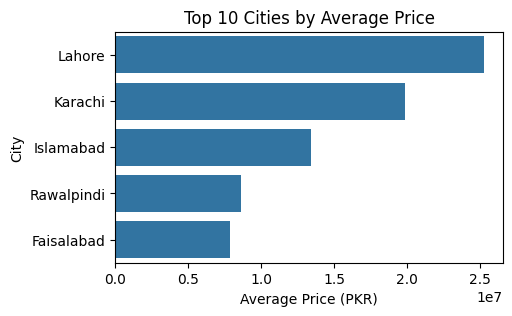

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x=top_cities.values, y=top_cities.index)
plt.title('Top 10 Cities by Average Price')
plt.xlabel('Average Price (PKR)')
plt.ylabel('City')
plt.show()

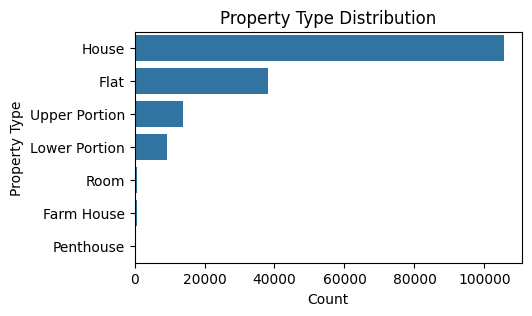

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(data=df, y='property_type', order=df['property_type'].value_counts().index)
plt.title('Property Type Distribution')
plt.xlabel('Count')
plt.ylabel('Property Type')
plt.show()

In [ ]:
df['year_month'] = df['date_added'].dt.to_period('M')

In [ ]:
monthly_trend = df.groupby('year_month')['price'].mean()

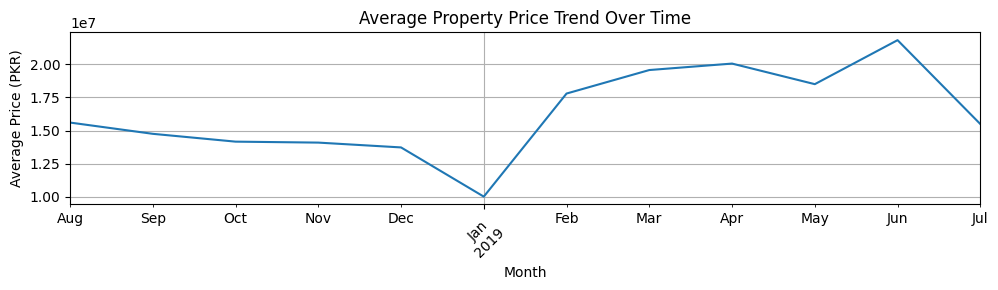

In [ ]:
plt.figure(figsize=(10, 3))
monthly_trend.plot()
plt.title('Average Property Price Trend Over Time')
plt.xlabel('Month')
plt.ylabel('Average Price (PKR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
monthly_city_trend = df.groupby(['year_month', 'city'])['price'].mean().unstack()

<Figure size 1500x600 with 0 Axes>

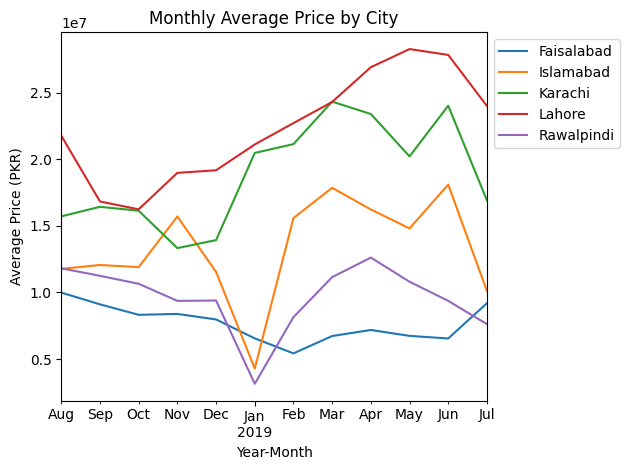

In [ ]:
plt.figure(figsize=(15, 6))
monthly_city_trend.plot()
plt.title('Monthly Average Price by City')
plt.ylabel('Average Price (PKR)')
plt.xlabel('Year-Month')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [ ]:
monthly_listing_volume = df.groupby('year_month').size()

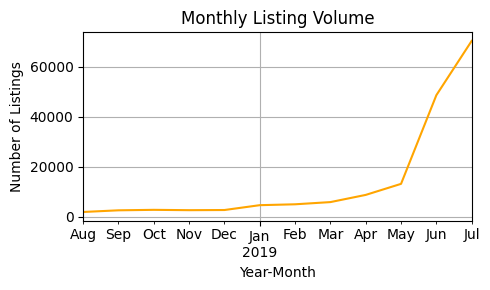

In [ ]:
plt.figure(figsize=(5, 3))
monthly_listing_volume.plot(color='orange')
plt.title('Monthly Listing Volume')
plt.xlabel('Year-Month')
plt.ylabel('Number of Listings')
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
df = df.drop(columns=['year_month'], axis=1)

In [ ]:
avg_price_type = df.groupby('property_type')['price'].mean().sort_values(ascending=False)

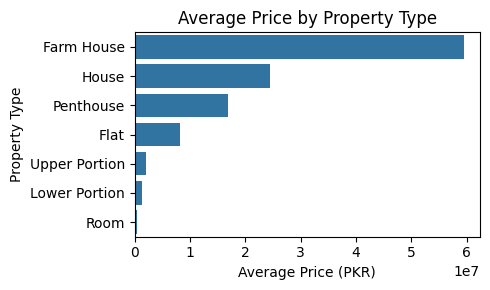

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x=avg_price_type.values, y=avg_price_type.index)
plt.title('Average Price by Property Type')
plt.xlabel('Average Price (PKR)')
plt.ylabel('Property Type')
plt.tight_layout()
plt.show()

In [ ]:
avg_price_province = df.groupby('province_name')['price'].mean().sort_values(ascending=False)

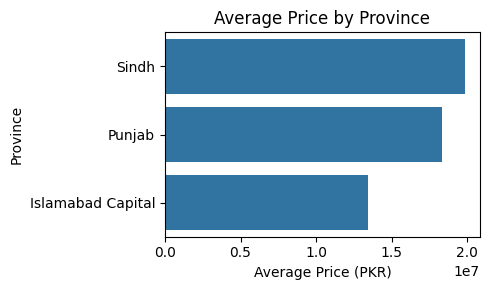

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x=avg_price_province.values, y=avg_price_province.index)
plt.title('Average Price by Province')
plt.xlabel('Average Price (PKR)')
plt.ylabel('Province')
plt.tight_layout()
plt.show()

#Feature Selection

In [ ]:
df.columns

Index(['property_id', 'location_id', 'property_type', 'price', 'location',
       'city', 'province_name', 'latitude', 'longitude', 'baths', 'purpose',
       'bedrooms', 'date_added', 'Area Size', 'Area Category'],
      dtype='object')

<Axes: >

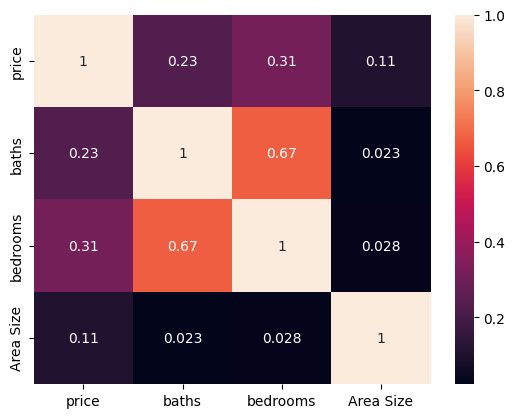

In [ ]:
sns.heatmap(df[['price','baths','bedrooms','Area Size']].corr(), annot=True)

In [ ]:
df_model = df.copy()

In [ ]:
df_model = df_model.drop(['property_id', 'location_id', 'latitude', 'longitude', 'location', 'date_added'], axis=1)

In [ ]:
X = df_model.drop('price', axis=1)
y = df_model['price']

In [ ]:
X['Area Category'] = X['Area Category'].astype(str)  # ensure string format for encoding

In [ ]:
# Target Encoding
encoder = ce.TargetEncoder(cols=X.select_dtypes(include='object').columns.tolist())

In [ ]:
X_encoded = encoder.fit_transform(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [ ]:
feature_names = X_encoded.columns
importances = model.feature_importances_

In [ ]:
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

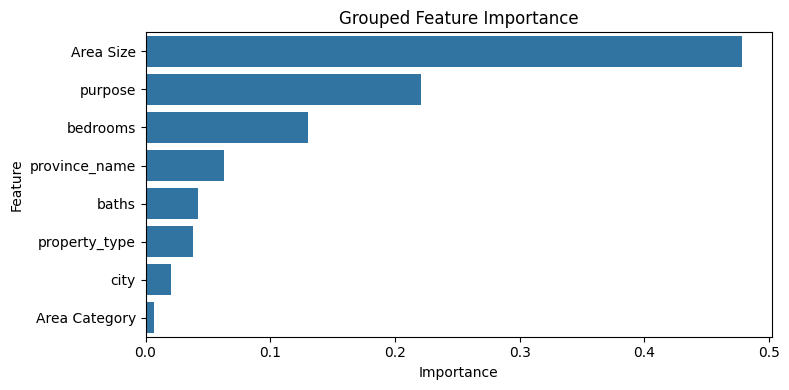

In [ ]:
plt.figure(figsize=(8, 4))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title("Grouped Feature Importance")
plt.tight_layout()
plt.show()

#Regression Modeling

##Regression Models Combined

In [ ]:
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "KNN": KNeighborsRegressor()
}

In [ ]:
results = []
for name, model_instance in models.items():
    model_instance.fit(X_train, y_train)
    preds = model_instance.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)

    results.append({
        'Model': name,
        'MAE': round(mae),
        'RMSE': round(rmse),
        'R2 Score': round(r2, 4)
    })

In [ ]:
results_df = pd.DataFrame(results).sort_values(by='R2 Score', ascending=False)
results_df

,Model,MAE,RMSE,R2 Score
2,KNN,5179134,17142683,0.7515
1,Decision Tree,4962039,17618061,0.7375
0,Linear Regression,12963731,26593983,0.4020


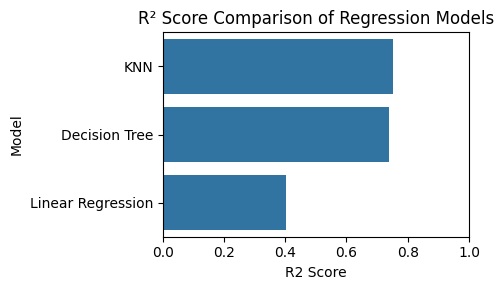

In [ ]:
plt.figure(figsize=(5, 3))
sns.barplot(x='R2 Score', y='Model', data=results_df)
plt.title('R² Score Comparison of Regression Models')
plt.xlim(0, 1)
plt.tight_layout()
plt.show()

## Random Forest Regressor - Ensemble learning (Bagging)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
mae_rfr = mean_absolute_error(y_test, y_pred)

In [ ]:
rmse_rfr = np.sqrt(mean_squared_error(y_test, y_pred))

In [ ]:
r2_rfr = r2_score(y_test, y_pred)

In [ ]:
print("Model Performance on Test Set:")
print(f"Mean Absolute Error (MAE): {mae_rfr:,.0f}")
print(f"Root Mean Squared Error (RMSE): {rmse_rfr:,.0f}")
print(f"R² Score: {r2_rfr:.4f}")

Model Performance on Test Set:
Mean Absolute Error (MAE): 4,891,609
Root Mean Squared Error (RMSE): 16,437,740
R² Score: 0.7715


##LGBM Regressor - Ensemble learning (Boosting)

In [ ]:
lgb_model = lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, max_depth=-1, random_state=42, n_jobs=-1)

In [ ]:
lgb_model.fit(X_train, y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003635 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 289
[LightGBM] [Info] Number of data points in the train set: 134754, number of used features: 8
[LightGBM] [Info] Start training from score 17817532.023613


LGBMRegressor(n_jobs=-1, random_state=42)

In [ ]:
y_pred_lgb = lgb_model.predict(X_test)

In [ ]:
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)

In [ ]:
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))

In [ ]:
r2_lgb = r2_score(y_test, y_pred_lgb)

In [ ]:
print(f"LightGBM Performance:")
print(f"MAE: {mae_lgb:,.0f}")
print(f"RMSE: {rmse_lgb:,.0f}")
print(f"R² Score: {r2_lgb:.4f}")

LightGBM Performance:
MAE: 5,441,009
RMSE: 16,645,337
R² Score: 0.7657


##Stacking Regressor - Ensemble learning

In [ ]:
estimators = [
    ('rf', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)),
    ('knn', KNeighborsRegressor()),
    ('lgb', lgb.LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42))
]

In [ ]:
# Meta-learner
final_estimator = LinearRegression()

In [ ]:
stack_model = StackingRegressor(estimators=estimators, final_estimator=final_estimator, cv=5, n_jobs=-1)

In [ ]:
stack_model.fit(X_train, y_train)

StackingRegressor(cv=5,
                  estimators=[('rf',
                               RandomForestRegressor(n_jobs=-1,
                                                     random_state=42)),
                              ('knn', KNeighborsRegressor()),
                              ('lgb', LGBMRegressor(random_state=42))],
                  final_estimator=LinearRegression(), n_jobs=-1)

In [ ]:
y_pred_stack = stack_model.predict(X_test)

In [ ]:
mae_stack = mean_absolute_error(y_test, y_pred_stack)

In [ ]:
rmse_stack = np.sqrt(mean_squared_error(y_test, y_pred_stack))

In [ ]:
r2_stack = r2_score(y_test, y_pred_stack)

In [ ]:
print("Stacking Regressor Performance:")
print(f"MAE: {mae_stack:,.0f}")
print(f"RMSE: {rmse_stack:,.0f}")
print(f"R² Score: {r2_stack:.4f}")


Stacking Regressor Performance:
MAE: 5,157,483
RMSE: 16,258,074
R² Score: 0.7765


##Comparison of Regression Models

In [ ]:
new_models = pd.DataFrame([
    {'Model': 'Random Forest', 'MAE': mae_rfr, 'RMSE': rmse_rfr, 'R2 Score': r2_rfr},
    {'Model': 'LightGBM', 'MAE': mae_lgb, 'RMSE': rmse_lgb, 'R2 Score': r2_lgb},
    {'Model': 'Stacking Regressor', 'MAE': mae_stack, 'RMSE': rmse_stack, 'R2 Score': r2_stack}
])

In [ ]:
results_df = pd.concat([results_df, new_models], ignore_index=True)

In [ ]:
results_df = results_df.sort_values(by='R2 Score', ascending=False).reset_index(drop=True)

In [ ]:
results_df['MAE'] = results_df['MAE'].apply(lambda x: f"{x:,.0f}")
results_df['RMSE'] = results_df['RMSE'].apply(lambda x: f"{x:,.0f}")
results_df['R2 Score ↑'] = results_df['R2 Score'].apply(lambda x: round(x, 4))
results_df

,Model,MAE,RMSE,R2 Score,R2 Score ↑
0,Stacking Regressor,"5,157,483","16,258,074",0.776492,0.7765
1,Random Forest,"4,891,609","16,437,740",0.771525,0.7715
2,LightGBM,"5,441,009","16,645,337",0.765718,0.7657
3,KNN,"5,179,134","17,142,683",0.751500,0.7515
4,Decision Tree,"4,962,039","17,618,061",0.737500,0.7375
5,Linear Regression,"12,963,731","26,593,983",0.402000,0.4020


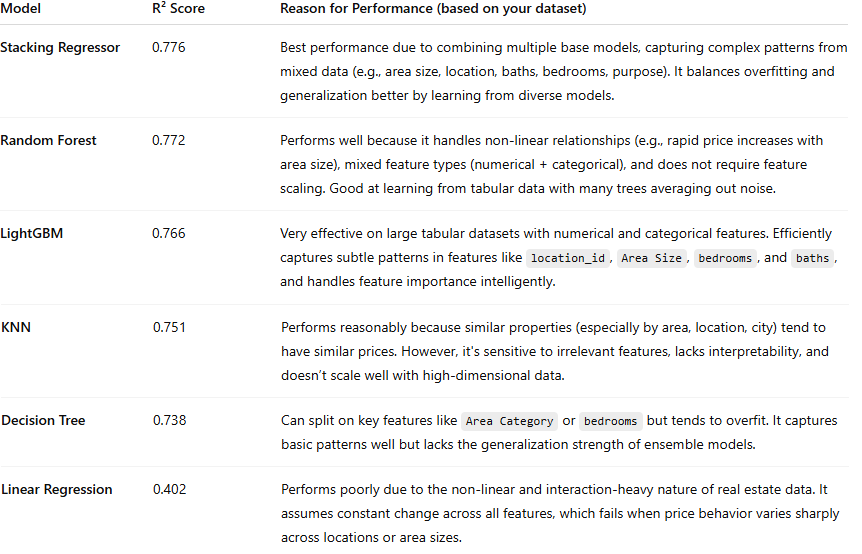

<ipython-input-83-a835e31fd2f2>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='R2 Score', y='Model', data=results_df, palette='viridis')


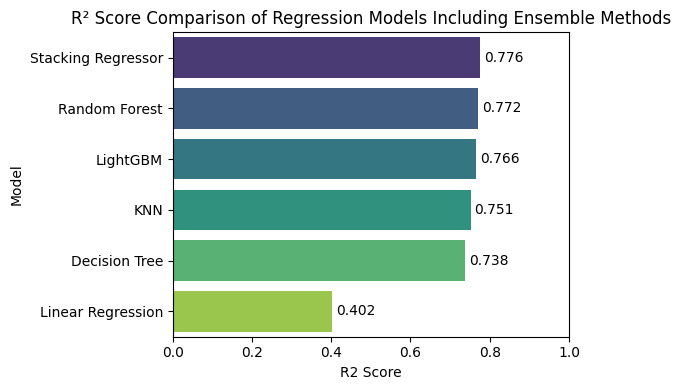

In [ ]:
plt.figure(figsize=(6, 4))
ax = sns.barplot(x='R2 Score', y='Model', data=results_df, palette='viridis')
plt.title('R² Score Comparison of Regression Models Including Ensemble Methods')
plt.xlim(0, 1)
plt.tight_layout()
# Add value labels on each bar
for patch in ax.patches:
    width = patch.get_width()
    y = patch.get_y() + patch.get_height() / 2
    ax.text(width + 0.01, y, f'{width:.3f}', va='center')

plt.show()

#Classification Modeling

In [ ]:
low_thresh = df['price'].quantile(0.33)
high_thresh = df['price'].quantile(0.66)

In [ ]:
def price_category(price):
    if price <= low_thresh:
        return 'Low'
    elif price <= high_thresh:
        return 'Mid'
    else:
        return 'High'

In [ ]:
df['price_category'] = df['price'].apply(price_category)

In [ ]:
df.groupby('price_category').size().reset_index(name='count')

,price_category,count
0,High,55708
1,Low,55642
2,Mid,57093


In [ ]:
le = LabelEncoder()

In [ ]:
df['price_category_encoded'] = le.fit_transform(df['price_category'])

In [ ]:
features = ['location_id', 'baths', 'bedrooms', 'Area Size']

In [ ]:
X = df[features]
y = df['price_category_encoded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##KNN Classification

In [ ]:
scaler = StandardScaler()

In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_test_scaled = scaler.transform(X_test)

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn_model.fit(X_train_scaled, y_train)

KNeighborsClassifier()

In [ ]:
knn_preds = knn_model.predict(X_test_scaled)

In [ ]:
print("KNN Classification Report:")
print(classification_report(y_test, knn_preds, target_names=le.classes_))

KNN Classification Report:
              precision    recall  f1-score   support

        High       0.76      0.81      0.79     11059
         Low       0.72      0.69      0.70     11218
         Mid       0.78      0.76      0.77     11412

    accuracy                           0.75     33689
   macro avg       0.75      0.75      0.75     33689
weighted avg       0.75      0.75      0.75     33689



## Logistic Regression as Classifer

In [ ]:
log_model = LogisticRegression(max_iter=1000, multi_class='multinomial', solver='lbfgs')

In [ ]:
log_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

In [ ]:
log_preds = log_model.predict(X_test_scaled)

In [ ]:
print("Logistic Regression Report:\n", classification_report(y_test, log_preds, target_names=le.classes_))

Logistic Regression Report:
               precision    recall  f1-score   support

        High       0.72      0.66      0.69     11059
         Low       0.56      0.40      0.47     11218
         Mid       0.59      0.80      0.68     11412

    accuracy                           0.62     33689
   macro avg       0.63      0.62      0.61     33689
weighted avg       0.62      0.62      0.61     33689



##Naive Bayes Classifier

In [ ]:
nb_model = GaussianNB()

In [ ]:
nb_model.fit(X_train, y_train)

GaussianNB()

In [ ]:
nb_preds = nb_model.predict(X_test)

In [ ]:
print("Naive Bayes Report:\n", classification_report(y_test, nb_preds, target_names=le.classes_))

Naive Bayes Report:
               precision    recall  f1-score   support

        High       0.71      0.48      0.57     11059
         Low       0.36      0.01      0.02     11218
         Mid       0.41      0.93      0.57     11412

    accuracy                           0.48     33689
   macro avg       0.50      0.47      0.39     33689
weighted avg       0.49      0.48      0.39     33689



##Decision Tree Classifier

In [ ]:
dt_model = DecisionTreeClassifier(random_state=42)

In [ ]:
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
dt_preds = dt_model.predict(X_test)

In [ ]:
print("Decision Tree Report:\n", classification_report(y_test, dt_preds, target_names=le.classes_))

Decision Tree Report:
               precision    recall  f1-score   support

        High       0.78      0.82      0.80     11059
         Low       0.74      0.72      0.73     11218
         Mid       0.80      0.79      0.79     11412

    accuracy                           0.78     33689
   macro avg       0.78      0.78      0.78     33689
weighted avg       0.78      0.78      0.78     33689



##Classification Models Comparison

In [ ]:
log_report = classification_report(y_test, log_preds, output_dict=True)
nb_report = classification_report(y_test, nb_preds, output_dict=True)
dt_report = classification_report(y_test, dt_preds, output_dict=True)
knn_report = classification_report(y_test, knn_preds, output_dict=True)

In [ ]:
comparison_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Naive Bayes', 'Decision Tree', 'K-Nearest Neighbors'],
    'Accuracy': [
        log_report['accuracy'],
        nb_report['accuracy'],
        dt_report['accuracy'],
        knn_report['accuracy']
    ],
    'Precision (Macro)': [
        log_report['macro avg']['precision'],
        nb_report['macro avg']['precision'],
        dt_report['macro avg']['precision'],
        knn_report['macro avg']['precision']
    ],
    'Recall (Macro)': [
        log_report['macro avg']['recall'],
        nb_report['macro avg']['recall'],
        dt_report['macro avg']['recall'],
        knn_report['macro avg']['recall']
    ],
    'F1-Score (Macro) ↑': [
        log_report['macro avg']['f1-score'],
        nb_report['macro avg']['f1-score'],
        dt_report['macro avg']['f1-score'],
        knn_report['macro avg']['f1-score']
    ]
})

In [ ]:
comparison_df = comparison_df.round(4)
comparison_df.sort_values(by='F1-Score (Macro) ↑', ascending=False, inplace=True)
comparison_df

,Model,Accuracy,Precision (Macro),Recall (Macro),F1-Score (Macro) ↑
2,Decision Tree,0.7757,0.7752,0.7759,0.7753
3,K-Nearest Neighbors,0.7519,0.7514,0.7521,0.7514
0,Logistic Regression,0.6233,0.6253,0.6224,0.6135
1,Naive Bayes,0.4752,0.4953,0.4726,0.3874


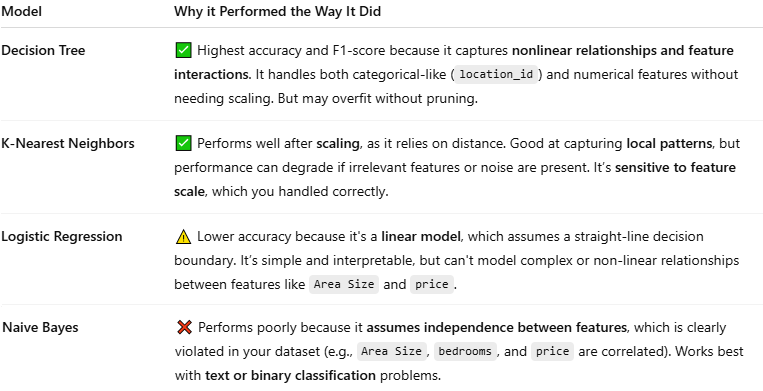

In [ ]:
metrics_melted = comparison_df.melt(id_vars='Model', var_name='Metric', value_name='Score')

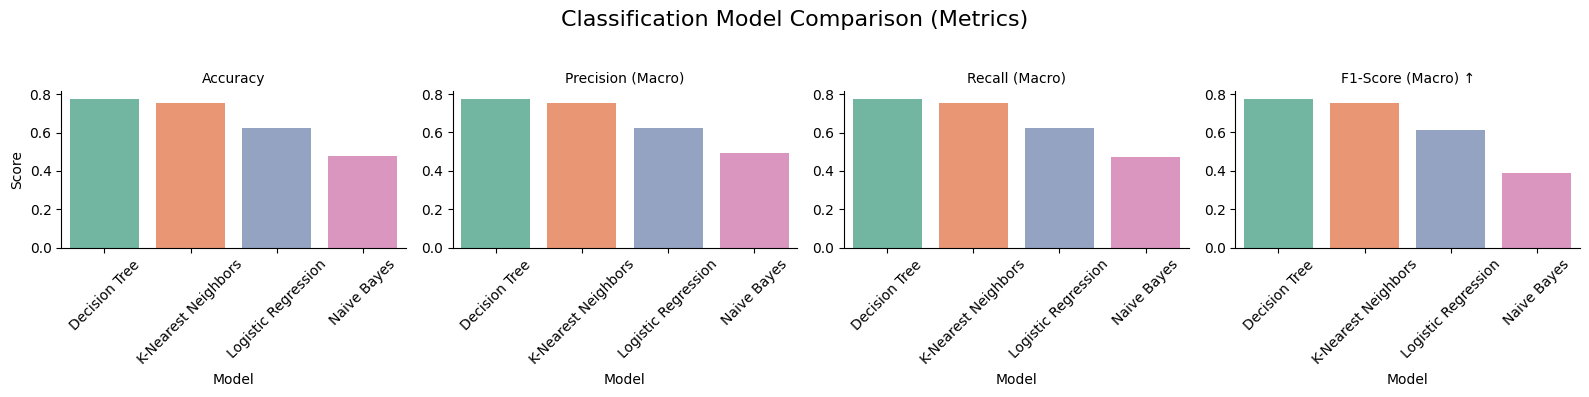

In [ ]:
g = sns.FacetGrid(metrics_melted, col="Metric", col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.barplot, x="Model", y="Score", hue='Model', palette="Set2", legend=False)
g.set_titles(col_template="{col_name}")
g.set_xticklabels(rotation=45)
g.fig.suptitle("Classification Model Comparison (Metrics)", fontsize=16)
g.fig.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
